# PART B: Download Wikipedia pages

In [3]:
import pandas as pd
cong113 = pd.read_csv('./data_US_congress/H113.csv', encoding='utf-8')
cong114 = pd.read_csv('./data_US_congress/H114.csv', encoding='utf-8')
cong115 = pd.read_csv('./data_US_congress/H115.csv', encoding='utf-8')

In [2]:
import urllib
from urllib.parse   import quote
from urllib.request import urlopen
import codecs
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2015-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

for wikiPage in cong113['WikiPageName']:
    nm = quote(wikiPage, safe='. ')
    title = "titles=%s"  % nm
    #title = quote("titles=", safe='/=_ e')
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content,
                                          rvprop, dataformat, rvdir, end,
                                          start, limit)
    #print(title)
    #print(query)
    html = urlopen(query).read()
    with open('/Users/javiescariz/Google Drive/DTU/Courses/SocialGraphs/Representatives/113/%s.txt' % wikiPage, 'w+', encoding='utf-8') as f:
        f.write(html.decode('utf-8'))
        f.close()

In [3]:
import urllib
from urllib.parse   import quote
from urllib.request import urlopen
import codecs
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2017-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

for wikiPage in cong114['WikiPageName']:
    nm = quote(wikiPage, safe='. ')
    title = "titles=%s"  % nm
    #title = quote("titles=", safe='/=_ e')
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content,
                                          rvprop, dataformat, rvdir, end,
                                          start, limit)
    #print(title)
    #print(query)
    html = urlopen(query).read()
    with open('/Users/javiescariz/Google Drive/DTU/Courses/SocialGraphs/Representatives/114/%s.txt' % wikiPage, 'w+', encoding='utf-8') as f:
        f.write(html.decode('utf-8'))
        f.close()

In [4]:
import urllib
from urllib.parse   import quote
from urllib.request import urlopen
import codecs
baseurl = "http://en.wikipedia.org/w/api.php/?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2018-09-29T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision

for wikiPage in cong115['WikiPageName']:
    nm = quote(wikiPage, safe='. ')
    title = "titles=%s"  % nm
    #title = quote("titles=", safe='/=_ e')
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content,
                                          rvprop, dataformat, rvdir, end,
                                          start, limit)
    #print(title)
    #print(query)
    html = urlopen(query).read()
    with open('/Users/javiescariz/Google Drive/DTU/Courses/SocialGraphs/Representatives/115/%s.txt' % wikiPage, 'w+', encoding='utf-8') as f:
        f.write(html.decode('utf-8'))
        f.close()

# PART C: Building the networks

## Example with one congressman

In [7]:
first_node = cong113.WikiPageName.sort_values().iloc[0]

In [8]:
path_folder = "../Representatives/113/"

In [9]:
import io

In [10]:
f = io.open(path_folder+first_node+'.txt', 'r', encoding='utf-8').read()

In [58]:
import re
links = re.findall("\[\[(.*?)\]\]", f)

In [78]:
links

['Special:ApiFeatureUsage',
 'Illinois',
 'Ray LaHood',
 'Ricca Slone',
 'Joan Krupa',
 'Morris, Minnesota|Morris',
 'Minnesota',
 'United States|U.S.',
 'Republican Party (United States)|Republican',
 'Illinois Central College',
 'Bradley University',
 'Conservative Baptists|Conservative Baptist',
 'United States House of Representatives|United States Representative',
 'Republican Party (United States)|Republican Party',
 'Peoria, Illinois|Peoria',
 'Springfield, Illinois|Springfield',
 'List of youngest members of the United States Congress|second youngest currently serving U.S. representative',
 'Patrick Murphy (Florida politician)|Patrick Murphy',
 'U.S. Congress',
 'Illinois House of Representatives',
 'Morris, Minnesota|Morris',
 'Minnesota',
 'Richwoods High School',
 'advanced placement',
 'Illinois Central College',
 'Bachelor of Science',
 'Bradley University',
 'Individual Retirement Account',
 'Chicago Magazine',
 'Peoria Journal Star',
 'National Journal',
 'File:Aaron Sch

In [155]:
links_simple = list()
wikilink_rx = re.compile(r'\[\[(?:[^|\]]*)\|?([^\]]+)\]\]')
for l in links:
    match = re.search(r'([a-zA-Z0-9_\s\(\)\-\,.]*)\|([a-zA-Z0-9_\s\(\)\-\,.]*)', l)
    if match == None:
        links_simple.append(l.replace(" ", "_"))
    else:
        links_simple.append(match.group(1).replace(" ", "_"))
        links_simple.append(match.group(2).replace(" ", "_"))

In [157]:
for l in links_simple:
    if l in set(cong113.WikiPageName):
        print(l)

Patrick_Murphy_(Florida_politician)
Eric_Cantor
John_Carney_(politician)
Devin_Nunes
Eric_Cantor
Patrick_McHenry
Patrick_Murphy_(Florida_politician)
Kurt_Schrader


## 113th Congress

In [1]:
import io
import re
import networkx as nx

congress113graph = nx.DiGraph()

In [23]:
path_folder = "../Representatives/113/"
for cm in cong113.WikiPageName.sort_values():
    
    #new node corresponding with new congressman
    congress113graph.add_node(cm,
                              state=cong113[cong113.WikiPageName == cm].State,
                              party=cong113[cong113.WikiPageName == cm].Party )
    
    f = io.open(path_folder+cm+'.txt', 'r', encoding='utf-8').read()
    links = re.findall("\[\[(.*?)\]\]", f)
    links_simple = list()
    wikilink_rx = re.compile(r'\[\[(?:[^|\]]*)\|?([^\]]+)\]\]')
    for l in links:
        match = re.search(r'([a-zA-Z0-9_\s\(\)\-\,.]*)\|([a-zA-Z0-9_\s\(\)\-\,.]*)', l)
        if match == None:
            m = l.replace(" ", "_")
            if m in set(cong113.WikiPageName):
                congress113graph.add_edge(cm, m)
        else:
            m1 = match.group(1).replace(" ", "_")
            m2 = match.group(2).replace(" ", "_")
            if m1 in set(cong113.WikiPageName):
                congress113graph.add_edge(cm, m1)
            if m2 in set(cong113.WikiPageName):
                congress113graph.add_edge(cm, m2)

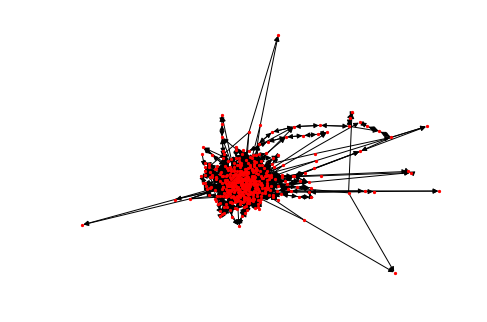

In [25]:
nx.draw_spring(congress113graph, node_size=5)

In [62]:
rep = list()
for node in congress113graph:
    if congress113graph.node[node]['party'].item() == 'Republican':
        rep.append(node)

In [64]:
len(rep)

240

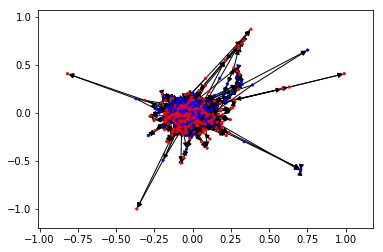

In [71]:

node_colors = ["red" if n in rep
               else 'blue' for n in congress113graph.nodes()]
nx.draw_networkx(congress113graph, pos=None, arrows=True, with_labels=False,
                 nodelist=congress113graph.nodes(),
                 node_color=node_colors,
                 node_size=5
                )

Number of nodes in the network

In [143]:
print(len(congress113graph.nodes))
print(len(congress113graph.edges))

444
1609


Plot in/out degree distribution

In [162]:
def plot_in_degree_distr():
    degs={}
    for n in congress113graph.nodes():
        deg = congress113graph.in_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k,v) in items], [v for (k,v) in items])
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    plt.title('113th House of Representatives In Degree Distribution')

def plot_out_degree_distr():
    degs={}
    for n in congress113graph.nodes():
        deg = congress113graph.out_degree(n)
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k,v) in items], [v for (k,v) in items])
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    plt.title('113th House of Representatives Out Degree Distribution')

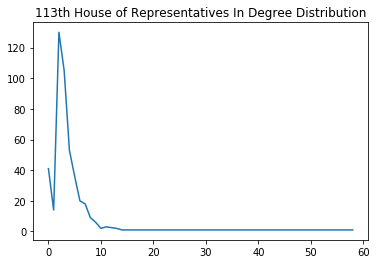

In [163]:
plot_in_degree_distr()

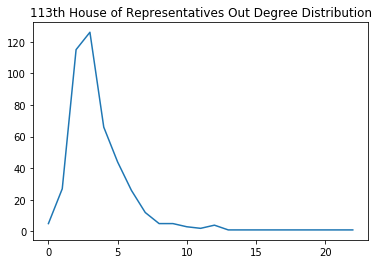

In [164]:
plot_out_degree_distr()

Who is the most connected representative?

In [141]:
max(congress113graph.degree(), key=lambda x : x[1])

('Nancy_Pelosi', 70)